# Crime Analysts

## Importing libraries and datasets

In [32]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

crimes = pd.read_csv('Crimes_-_One_year_prior_to_present.csv')
chicago = gpd.read_file('geo_export_7463001a-4631-4847-a27c-71ff3e712ac0.shp', )
population = pd.read_csv('population_2022.csv')

### Initial dataset exploration

In [33]:
crimes.shape

(223464, 17)

In [34]:
print("Columns of Crimes:\n")
for i in crimes.columns:
    print(str.strip(i))

Columns of Crimes:

CASE#
DATE  OF OCCURRENCE
BLOCK
IUCR
PRIMARY DESCRIPTION
SECONDARY DESCRIPTION
LOCATION DESCRIPTION
ARREST
DOMESTIC
BEAT
WARD
FBI CD
X COORDINATE
Y COORDINATE
LATITUDE
LONGITUDE
LOCATION


In [35]:
crimes.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JE421943,10/25/2021 12:00:00 PM,018XX W FULLERTON AVE,0560,ASSAULT,SIMPLE,CTA BUS,N,N,1931,32.0,08A,NaN,NaN,NaN,NaN,NaN
1,JE421824,10/25/2021 12:00:00 PM,002XX E 51ST ST,0560,ASSAULT,SIMPLE,OTHER (SPECIFY),N,N,231,3.0,08A,1178637.0,1871259.0,41.802037,-87.62039,"(41.802037251, -87.620390452)"
2,JE391597,09/28/2021 08:00:00 PM,007XX W OHIO ST,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,N,N,1214,27.0,06,NaN,NaN,NaN,NaN,NaN
3,JF112591,09/24/2021 12:00:00 AM,015XX S KARLOV AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,APARTMENT,N,N,1012,24.0,11,NaN,NaN,NaN,NaN,NaN
4,JF146587,12/24/2021 10:47:00 PM,014XX S BLUE ISLAND AVE,0460,BATTERY,SIMPLE,POLICE FACILITY / VEHICLE PARKING LOT,Y,N,1233,25.0,08B,NaN,NaN,NaN,NaN,NaN


In [36]:
type(crimes['DATE  OF OCCURRENCE'][1])

str

Since 'Date of Occurence' is a string, we need to extract its values(DD, MM, YYYY, HH) in new features.


### Adding new features

In [37]:
crimes['MONTH OF OCCURENCE'] = crimes['DATE  OF OCCURRENCE'].apply(lambda x : int(x.split()[0].split('/')[0]))
crimes['DAY OF MONTH'] = crimes['DATE  OF OCCURRENCE'].apply(lambda x : int(x.split()[0].split('/')[1]))
crimes['YEAR OF OCCURANCE'] = crimes['DATE  OF OCCURRENCE'].apply(lambda x : int(x.split()[0].split('/')[2]))

crimes['HOUR OF DAY'] = crimes['DATE  OF OCCURRENCE'].apply(lambda x : int(int((x.split()[1].split(':')[0]))+12) if x.split()[2]=='PM' else int(x.split()[1].split(':')[0]))


In [38]:
crimes[['MONTH OF OCCURENCE', 'DAY OF MONTH', 'YEAR OF OCCURANCE', 'HOUR OF DAY']].head()

,MONTH OF OCCURENCE,DAY OF MONTH,YEAR OF OCCURANCE,HOUR OF DAY
0,10,25,2021,24
1,10,25,2021,24
2,9,28,2021,20
3,9,24,2021,12
4,12,24,2021,22


In [39]:
crimes.describe()

,BEAT,WARD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,MONTH OF OCCURENCE,DAY OF MONTH,YEAR OF OCCURANCE,HOUR OF DAY
count,223464.000000,223453.000000,2.199270e+05,2.199270e+05,219927.000000,219927.000000,223464.000000,223464.000000,223464.000000,223464.000000
mean,1152.720975,23.332034,1.165447e+06,1.886886e+06,41.845193,-87.668364,6.641553,15.676279,2021.693450,14.058788
std,707.475735,14.215808,1.635189e+04,3.174283e+04,0.087292,0.059533,3.301635,8.846126,0.461062,6.391621
min,111.000000,1.000000,1.091242e+06,1.813909e+06,41.644595,-87.939733,1.000000,1.000000,2021.000000,1.000000
25%,533.000000,9.000000,1.154037e+06,1.859317e+06,41.769185,-87.709816,4.000000,8.000000,2021.000000,10.000000
50%,1032.000000,24.000000,1.167325e+06,1.893058e+06,41.862218,-87.661164,7.000000,16.000000,2022.000000,14.000000
75%,1731.000000,35.000000,1.176828e+06,1.909854e+06,41.908411,-87.626516,9.000000,23.000000,2022.000000,19.000000
max,2535.000000,50.000000,1.205119e+06,1.951499e+06,42.022548,-87.524529,12.000000,31.000000,2022.000000,24.000000


Removing whitespaces at the beginning and end of column names

In [40]:
ans = []
for i in crimes.columns:
    ans.append(str.strip(i))
crimes.columns = ans

crimes.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', 'IUCR', 'PRIMARY DESCRIPTION',
       'SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC',
       'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'MONTH OF OCCURENCE', 'DAY OF MONTH',
       'YEAR OF OCCURANCE', 'HOUR OF DAY'],
      dtype='object')

#### Checking for missing values

In [41]:
print("Missing values = ", crimes.isna().sum().sum(), "(", crimes.isna().sum().sum()*100/crimes.shape[0],'%)')

Missing values =  18363 ( 8.217430995596606 %)


In [42]:
crimes.dropna(inplace=True)

In [43]:
crimes.isna().sum().sum()

0

Now there are no missing/NaN values.

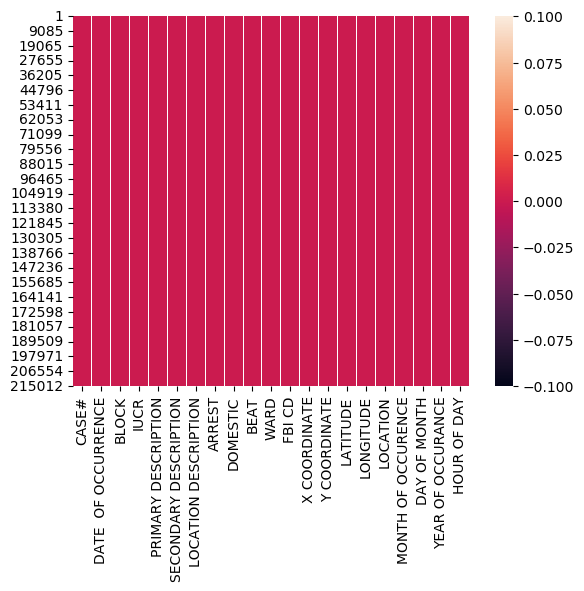

In [44]:
sns.heatmap(pd.isna(crimes))

### Creating broad crime description categories

In [45]:
crimes['PRIMARY DESCRIPTION'].nunique()

31

In [46]:
phy = "PHYSICAL HARM"
theft = "THEFT"
nhc = "NON-HARM CRIMES"
drug = "DRUG ABUSE"
other = 'OTHER'
prop = 'PROPERTY DAMAGE'
kidnap = 'KIDNAPPING/TRAFFICKING'
pros = "PROSTITUTION"
primary_desc = {
    'ASSAULT': phy,
    'BATTERY': phy,
    'CRIMINAL SEXUAL ASSAULT': phy,
    'HOMICIDE': phy,
    'SEX OFFENSE': phy,
    'CRIMINAL DAMAGE': prop,
    'ARSON': prop,
    'WEAPONS VIOLATION': nhc,
    'CRIMINAL TRESPASS': nhc,
    'DECEPTIVE PRACTICE': nhc,
    'STALKING': nhc,
    'CONCEALED CARRY LICENSE VIOLATION': nhc,
    'PROSTITUTION': pros,
    'OBSCENITY': nhc,
    'PUBLIC INDECENCY': nhc,
    'GAMBLING': nhc,
    'LIQUOR LAW VIOLATION': nhc,
    'PUBLIC PEACE VIOLATION': nhc,
    'INTERFERENCE WITH PUBLIC OFFICER': nhc,
    'THEFT': theft,
    'MOTOR VEHICLE THEFT': theft,
    'BURGLARY': theft,
    'ROBBERY': theft,
    'NARCOTICS': drug,
    'OTHER NARCOTIC VIOLATION': drug,
    'OTHER OFFENSE': other,
    'NON-CRIMINAL': other,
    'OFFENSE INVOLVING CHILDREN': other,
    'INTIMIDATION': other,
    'KIDNAPPING': kidnap,
    'HUMAN TRAFFICKING': kidnap
}

crimes['DESCRIPTION'] = crimes['PRIMARY DESCRIPTION'].map(primary_desc)

#### Converting crimes to a GeoPandas Dataframe

In [47]:
crime_map = gpd.GeoDataFrame(crimes, geometry=gpd.points_from_xy(crimes['LONGITUDE'], crimes['LATITUDE']))


### Population dataset

In [48]:
population.head()

,zip,city,county,pop
0,60629,Chicago,Cook,107930
1,60618,Chicago,Cook,94646
2,60639,Chicago,Cook,88515
3,60632,Chicago,Cook,86715
4,60647,Chicago,Cook,85658


In [49]:
populationF = population[population['city'] == 'Chicago']
chicago['zip'] = chicago['zip'].apply(lambda x : int(x))
merged = pd.merge(chicago,population ,on='zip')
pop = gpd.GeoDataFrame(merged, geometry='geometry')


# Plotting the dataset

Functions to help us plot graphs quicker for analysis.

In [50]:
def crime_density(c, col = 'RdYlGn_r'):
    target = c
    joined = gpd.sjoin(target, chicago, op='within')
    temp = joined.groupby('zip').count().filter(['geometry'])
    merged = pd.merge(temp, chicago, right_on='zip', left_index=True)
    merged.columns = ['count', 'object_id', 'area', 'length', 'zip', 'geometry']
    gdf = gpd.GeoDataFrame(merged, geometry='geometry')
#     gdf.plot('count', legend=True, cmap=col)
    return gdf

def crime_density_gpd(g, col='RdYlGn_r'):
    target = g
    g.plot(cmap=col, legend=True)

Text(24.847222222222214, 0.5, 'Latitude')

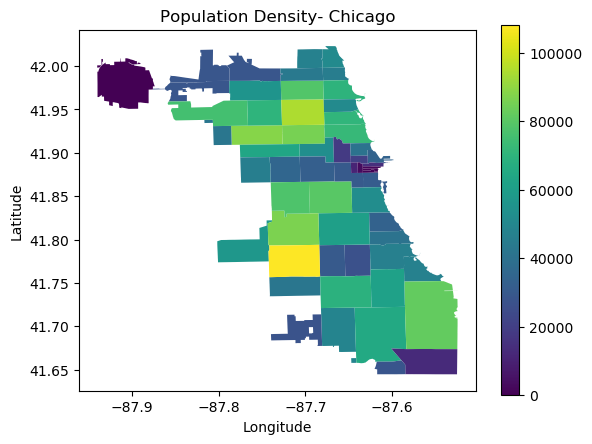

In [51]:
pop.plot('pop', legend=True)
plt.title('Population Density- Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(24.847222222222214, 0.5, 'Latitude')

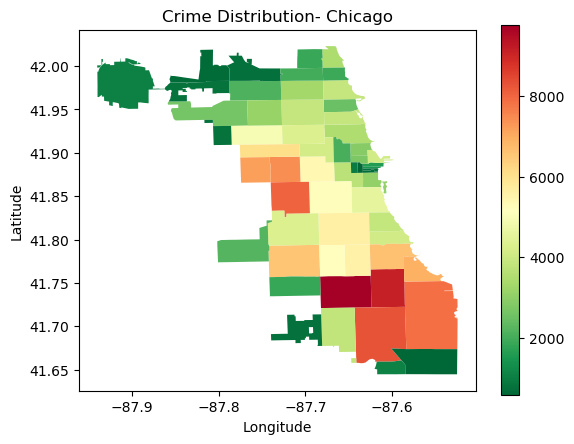

In [52]:
x = crime_density(crime_map)
x.plot('count', legend=True, cmap='RdYlGn_r')
plt.title('Crime Distribution- Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Now we will create a GeoDataFrame by combining all our data.

In [53]:
merged2 = gpd.sjoin(crime_map, pop, op='within')

merged2.drop('index_right', axis=1, inplace=True)

# merged2.head()

m3 = pd.merge(merged2, chicago[['zip','geometry']], how='inner', on='zip')

gdf = gpd.GeoDataFrame(m3, geometry='geometry_y')

### What proportion of criminals are arrested?

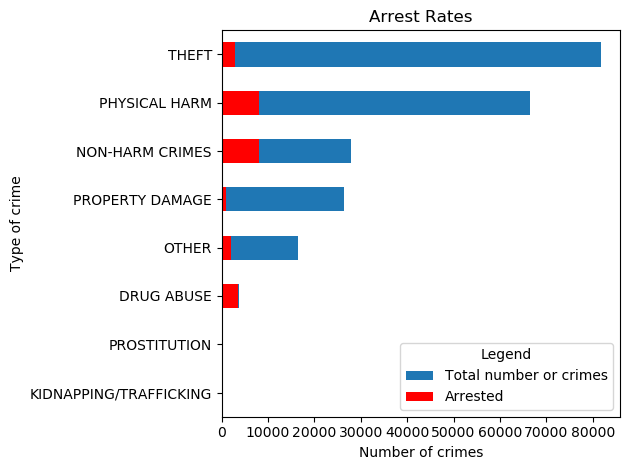

In [54]:
fig, ax = plt.subplots()
order = gdf.groupby('DESCRIPTION').count()['pop'].sort_values().index
gdf.groupby('DESCRIPTION').count().reindex(labels = order)['pop'].plot(kind='barh', ax=ax)
gdf[gdf['ARREST']=='Y'].groupby('DESCRIPTION').count().reindex(labels = order)['pop'].plot(kind='barh', ax=ax, color='red')
plt.legend(['Total number or crimes', 'Arrested'],loc='lower right', title='Legend')
plt.xlabel("Number of crimes")
plt.ylabel("Type of crime")
plt.title("Arrest Rates")
plt.tight_layout()

### Zooming into Drug Abuse and Prostitution

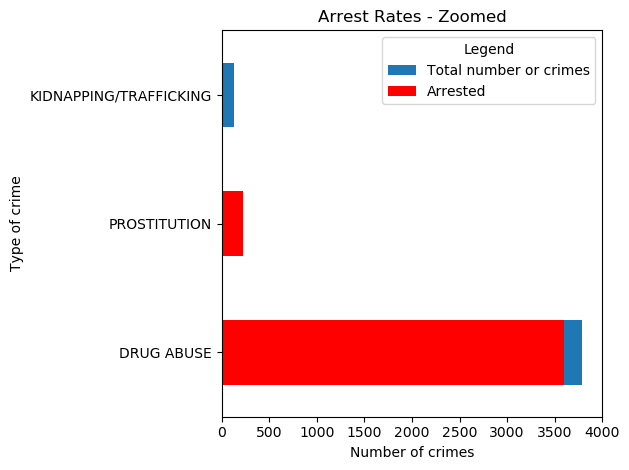

In [55]:
fig, ax = plt.subplots()
order = gdf.groupby('DESCRIPTION').count()['pop'].sort_values().index
gdf.groupby('DESCRIPTION').count().reindex(labels = order)['pop'].loc[['DRUG ABUSE','PROSTITUTION','KIDNAPPING/TRAFFICKING']].plot(kind='barh', ax=ax)
gdf[gdf['ARREST']=='Y'].groupby('DESCRIPTION').count().reindex(labels = order)['pop'].loc[['DRUG ABUSE','PROSTITUTION', 'KIDNAPPING/TRAFFICKING']].plot(kind='barh', ax=ax, color='red')
plt.legend(['Total number or crimes', 'Arrested'],loc='upper right', title='Legend')
plt.xlabel("Number of crimes")
plt.ylabel("Type of crime")
plt.title("Arrest Rates - Zoomed")
plt.xlim(0,4000)
plt.tight_layout()

In [56]:
temp = gdf.groupby(['DESCRIPTION','ARREST']).count().loc[['DRUG ABUSE', 'PROSTITUTION', 'KIDNAPPING/TRAFFICKING']]["CASE#"]
temp.columns = ['Count']
temp

DESCRIPTION             ARREST
DRUG ABUSE              N          188
                        Y         3600
KIDNAPPING/TRAFFICKING  N          117
                        Y            9
PROSTITUTION            N            3
                        Y          225
Name: CASE#, dtype: int64

#### Drug abuse has an arrest rate of over 95% whereas Prostitution has an arrest rate of over 98%.

### Let's take a look at their distributions on the map

Text(0.5, 1, 'Prostitution Distribution')

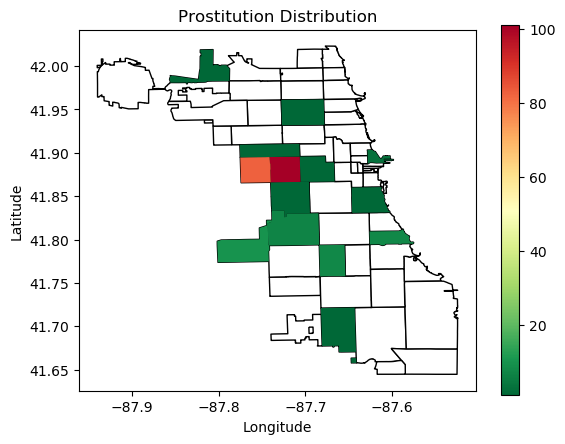

In [57]:
temp = crime_density(crime_map[crime_map['DESCRIPTION']=='PROSTITUTION'])
fig, ax = plt.subplots()
chicago.plot(color='white', edgecolor='black', ax=ax)
temp.plot('count', legend=True, cmap='RdYlGn_r', ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Prostitution Distribution')

Text(0.5, 1, 'Drug Abuse Distribution')

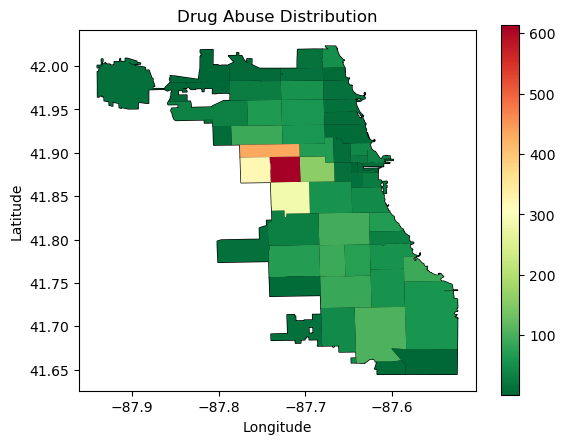

In [58]:
temp = crime_density(crime_map[crime_map['DESCRIPTION']=='DRUG ABUSE'])
fig, ax = plt.subplots()
chicago.plot(color='white', edgecolor='black', ax=ax)
temp.plot('count', legend=True, cmap='RdYlGn_r', ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Drug Abuse Distribution')

#### Both Drug Abuse and Prostitution are concentrated in the same two districts. These are the two crime types with the highest arrest-rates.

#### Now let's see whether these areas have a higher than average arrest-rate for other types of crime as well.

Text(0.5, 1, 'Arrests for other crimes')

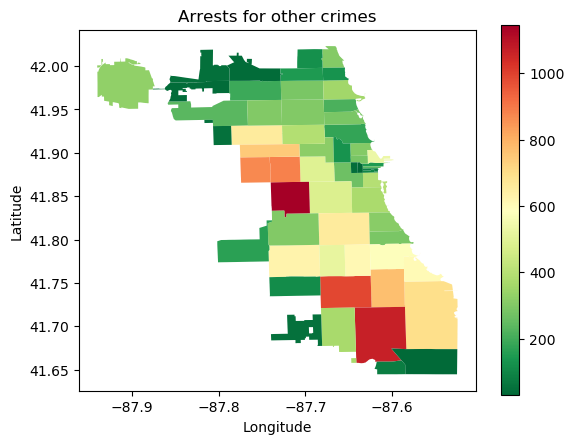

In [59]:
temp = crime_density(crime_map[(crime_map['ARREST']=='Y')&(crime_map['DESCRIPTION']!='DRUG ABUSE')&(crime_map['DESCRIPTION']!='PROSTITUTION')])
temp.plot('count', legend=True, cmap='RdYlGn_r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Arrests for other crimes')

### The areas with high drug traffic and prostitution have a higher arrest-rate for other types of crime as well.

## Temporal Datapoints

### Is the location of the crime correlated with time?

### Crimes By Months

Text(0.5, 1.0, 'CRIME DISTRIBUTION BY MONTH')

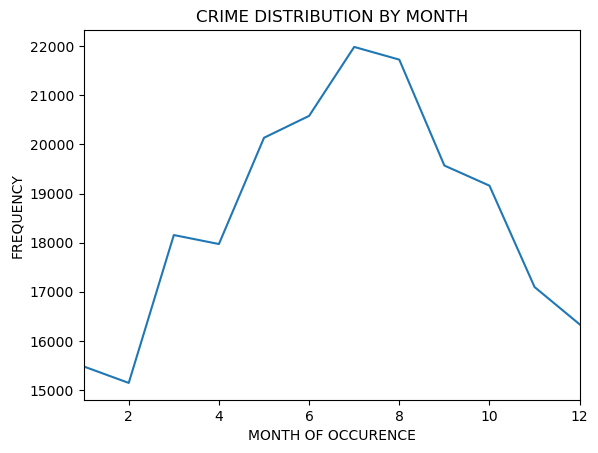

In [61]:
gdf.groupby('MONTH OF OCCURENCE').count().iloc[:,1].plot(kind='line')
plt.ylabel('FREQUENCY')
plt.title('CRIME DISTRIBUTION BY MONTH')
# plt.ylim(0,25000)

That concludes the analysis.
Thank you.